In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import seaborn as sns

sns.set_theme(style="whitegrid", context="talk", font="DejaVu Sans")
plt.rcParams.update({
    "figure.dpi": 120,
    "axes.titlesize": 16,
    "axes.labelsize": 13,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "axes.titleweight": "semibold",
    "grid.alpha": 0.35,
    "grid.linestyle": "--",
    "lines.linewidth": 2.2,
    "lines.markersize": 5,
    "axes.facecolor": "#F8F9FB",
    "figure.facecolor": "white"
})

PALETTE = sns.color_palette("tab10")
TRAIN_COLOR = PALETTE[0]
VAL_COLOR = PALETTE[1]
ACCENT_COLOR = PALETTE[2]

def style_axes(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(True, which="major")

# Ensure output folder exists
os.makedirs("plots", exist_ok=True)

# Training history data
history = {
    "loss": [0.6321,0.5367,0.5050,0.4860,0.4616,0.4476,0.4341,0.4212,0.4098,0.3890],
    "val_loss": [3.9746,0.8181,0.7189,0.5371,0.6093,0.4491,0.5221,0.4378,0.5098,0.4223],

    "accuracy": [0.8204,0.8531,0.8625,0.8677,0.8746,0.8792,0.8830,0.8859,0.8891,0.8954],
    "val_accuracy": [0.6749,0.8135,0.8266,0.8694,0.8417,0.8800,0.8692,0.8866,0.8743,0.8916],

    "dice_coeff": [0.7420,0.7779,0.7909,0.7999,0.8108,0.8159,0.8219,0.8273,0.8339,0.8421],
    "val_dice_coeff": [0.3601,0.7343,0.7876,0.8322,0.7984,0.8345,0.8236,0.8437,0.8227,0.8549],

    "iou_metric": [0.5925,0.6370,0.6546,0.6669,0.6821,0.6894,0.6981,0.7059,0.7154,0.7276],
    "val_iou_metric": [0.2252,0.5863,0.6507,0.7133,0.6651,0.7168,0.7013,0.7307,0.7004,0.7473],

    "precision": [0.7665,0.8115,0.8313,0.8400,0.8485,0.8560,0.8587,0.8647,0.8702,0.8773],
    "val_precision": [0.9807,0.9328,0.7518,0.8417,0.7955,0.8672,0.8764,0.9033,0.9225,0.8837],

    "recall": [0.8342,0.8319,0.8305,0.8365,0.8477,0.8474,0.8546,0.8579,0.8626,0.8705],
    "val_recall": [0.2256,0.6138,0.8714,0.8502,0.8486,0.8500,0.8118,0.8254,0.7730,0.8619],

    "f1_score": [0.7950,0.8199,0.8294,0.8369,0.8466,0.8508,0.8555,0.8602,0.8654,0.8729],
    "val_f1_score": [0.3588,0.7287,0.8057,0.8444,0.8150,0.8563,0.8389,0.8610,0.8393,0.8711]
}

epochs = np.arange(1, 11)


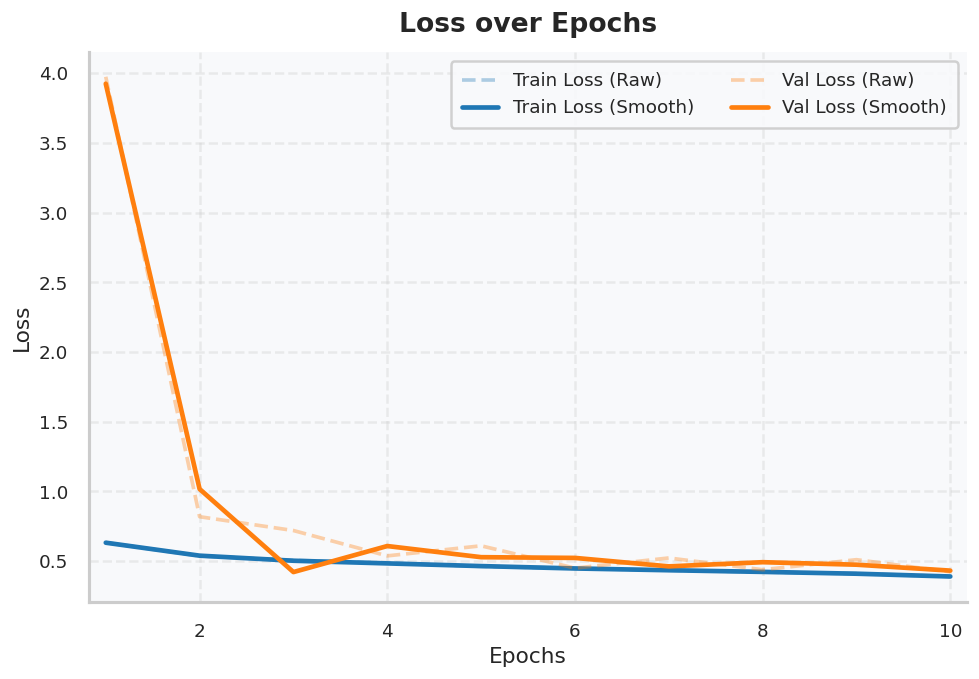

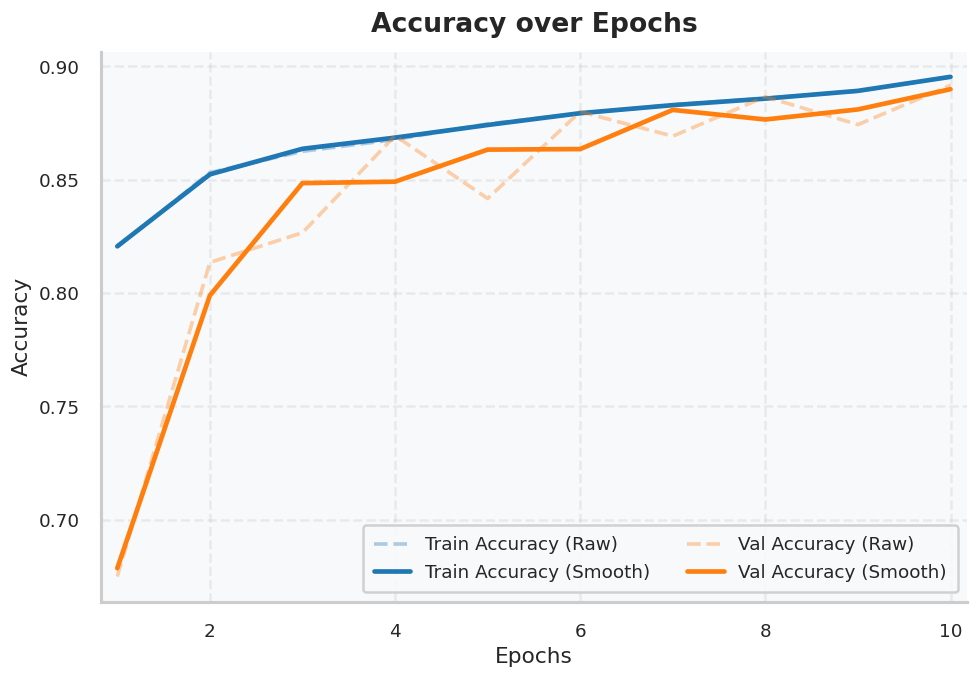

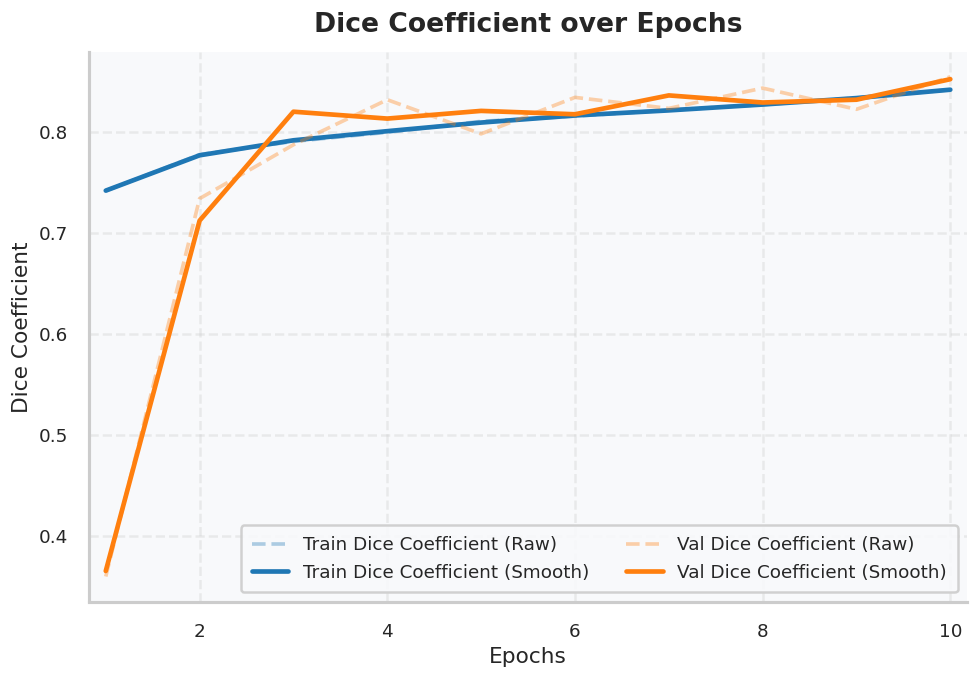

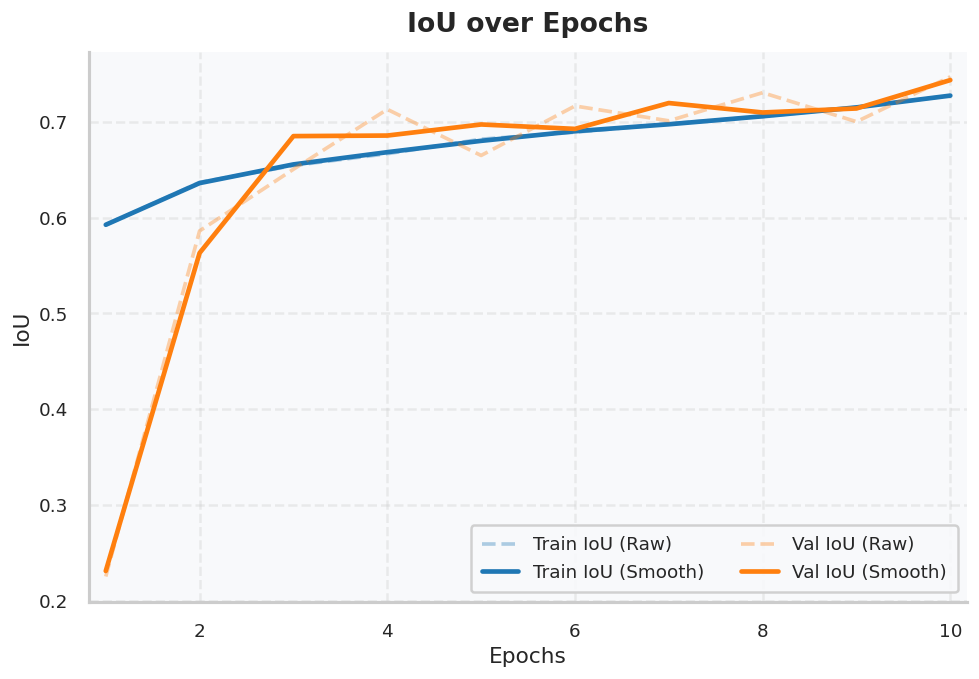

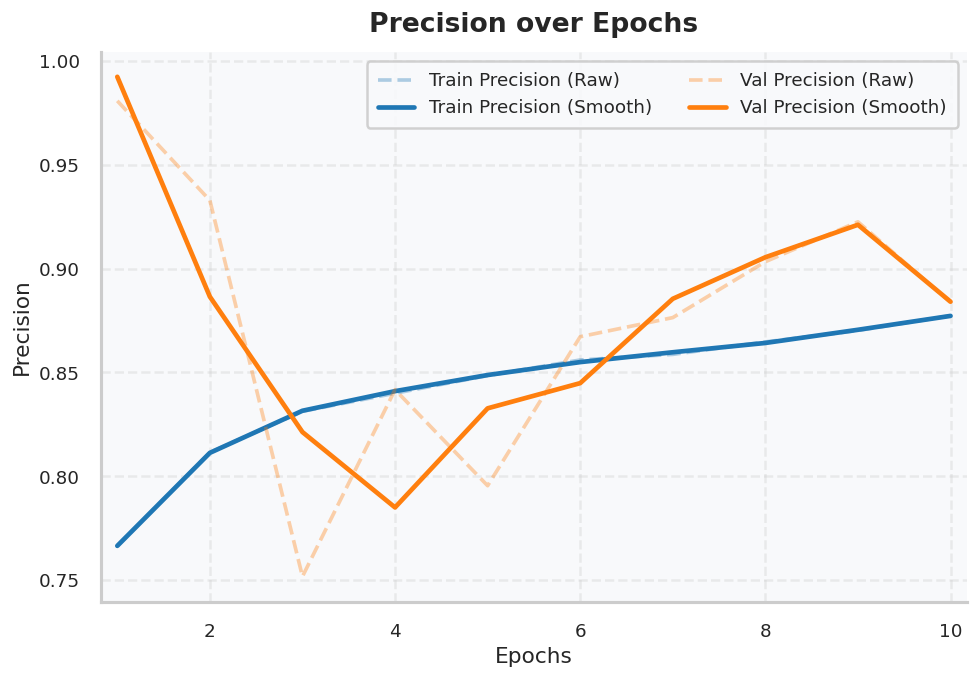

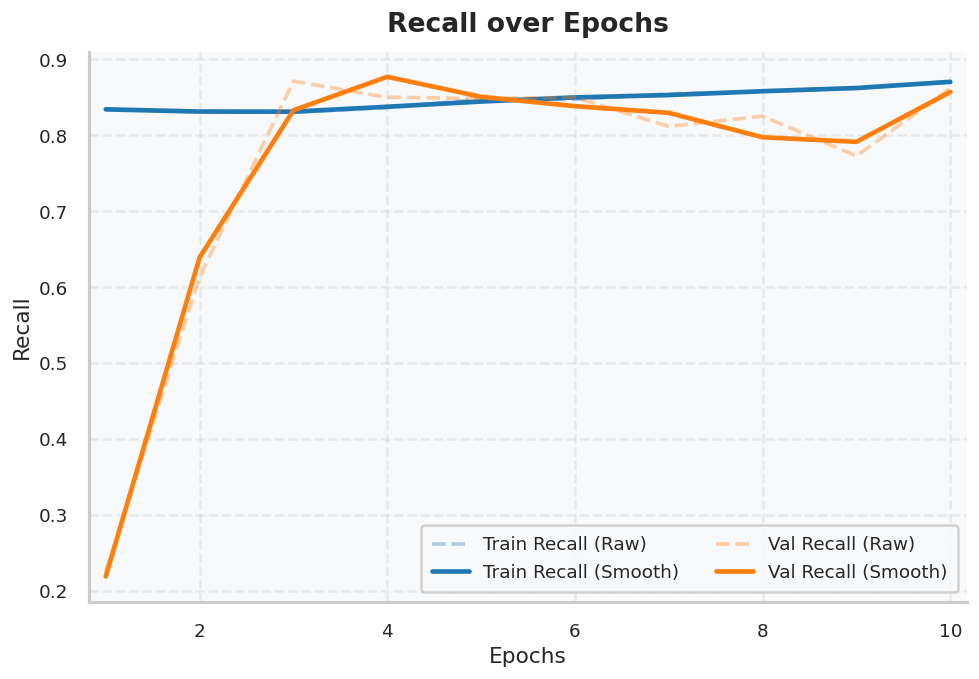

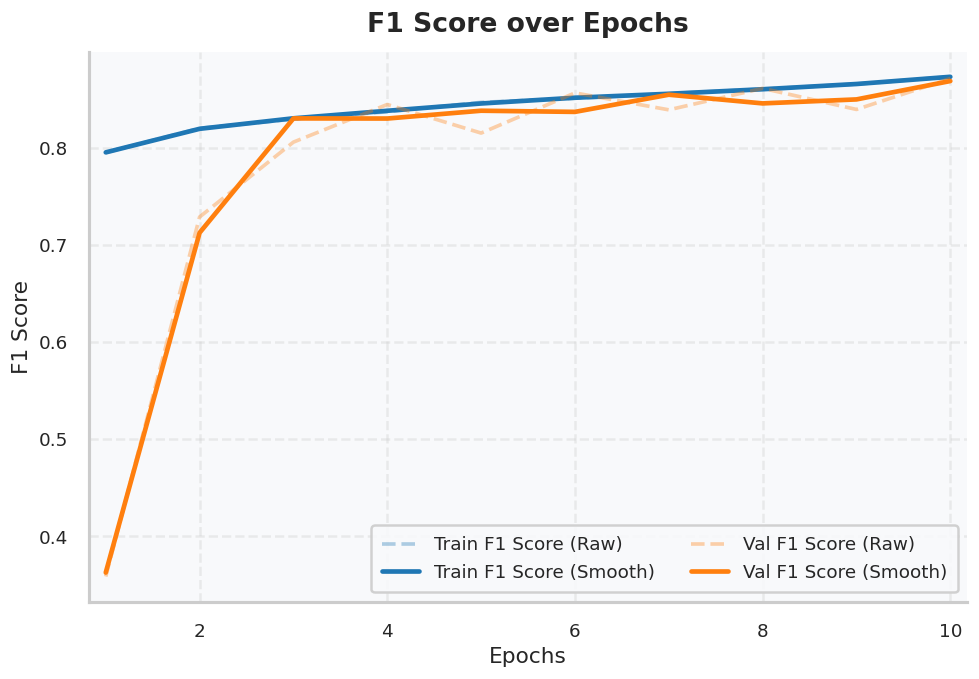

In [14]:
def plot_metric(metric, label):
    fig, ax = plt.subplots(figsize=(8.5,6))
    train = np.array(history[metric])
    val = np.array(history["val_" + metric])

    # Smooth curves
    if len(train) >= 5:
        train_smooth = savgol_filter(train, 5, 3)
        val_smooth = savgol_filter(val, 5, 3)
    else:
        train_smooth, val_smooth = train, val

    ax.plot(epochs, train, linestyle="--", alpha=0.35, color=TRAIN_COLOR, label=f"Train {label} (Raw)")
    ax.plot(epochs, train_smooth, linewidth=2.8, color=TRAIN_COLOR, label=f"Train {label} (Smooth)")

    ax.plot(epochs, val, linestyle="--", alpha=0.35, color=VAL_COLOR, label=f"Val {label} (Raw)")
    ax.plot(epochs, val_smooth, linewidth=2.8, color=VAL_COLOR, label=f"Val {label} (Smooth)")

    ax.set_xlabel("Epochs")
    ax.set_ylabel(label)
    ax.set_title(f"{label} over Epochs", pad=12)
    style_axes(ax)
    ax.margins(x=0.02)
    ax.legend(ncol=2, frameon=True, framealpha=0.9, borderpad=0.6)

    fig.tight_layout()
    fig.savefig(f"plots/scientific_{metric}.png", dpi=400, bbox_inches="tight", facecolor="white")
    plt.show()

metrics = [
    ("loss", "Loss"),
    ("accuracy", "Accuracy"),
    ("dice_coeff", "Dice Coefficient"),
    ("iou_metric", "IoU"),
    ("precision", "Precision"),
    ("recall", "Recall"),
    ("f1_score", "F1 Score")
]

for m, l in metrics:
    plot_metric(m, l)


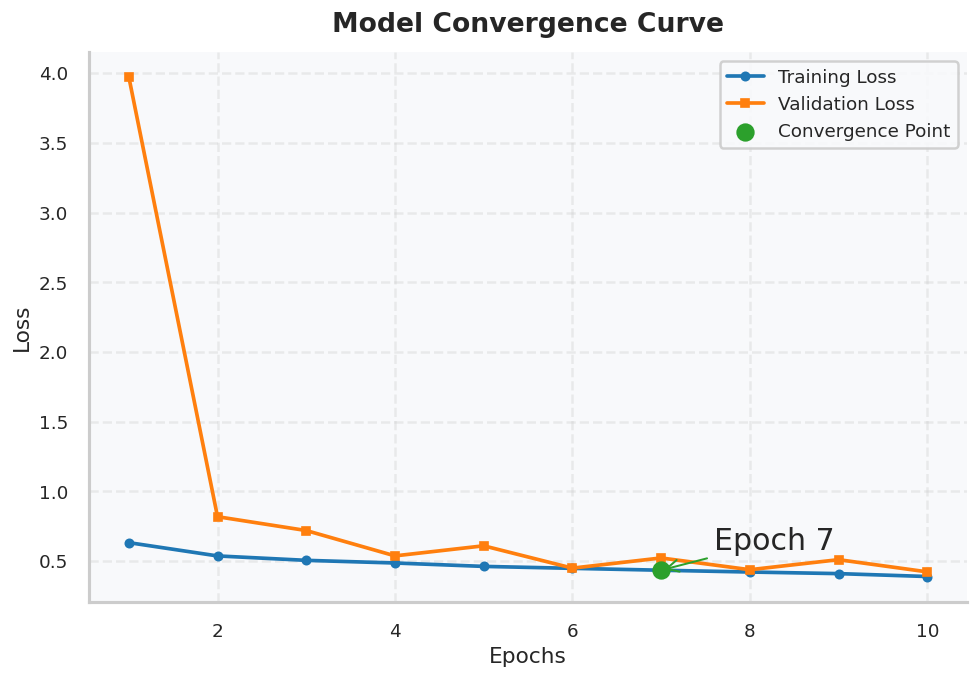

In [15]:
fig, ax = plt.subplots(figsize=(8.5,6))
ax.plot(epochs, history['loss'], color=TRAIN_COLOR, marker="o", label="Training Loss")
ax.plot(epochs, history['val_loss'], color=VAL_COLOR, marker="s", label="Validation Loss")

conv_epoch = 7
conv_loss = history['loss'][conv_epoch - 1]
ax.scatter([conv_epoch], [conv_loss], color=ACCENT_COLOR, s=90, zorder=5, label="Convergence Point")
ax.annotate("Epoch 7", xy=(conv_epoch, conv_loss), xytext=(conv_epoch + 0.6, conv_loss + 0.15),
            arrowprops=dict(arrowstyle="->", color=ACCENT_COLOR, lw=1.2))

ax.set_title("Model Convergence Curve", pad=12)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
style_axes(ax)
ax.legend(frameon=True, framealpha=0.9)

fig.tight_layout()
fig.savefig("plots/convergence_curve.png", dpi=400, bbox_inches="tight", facecolor="white")
plt.show()


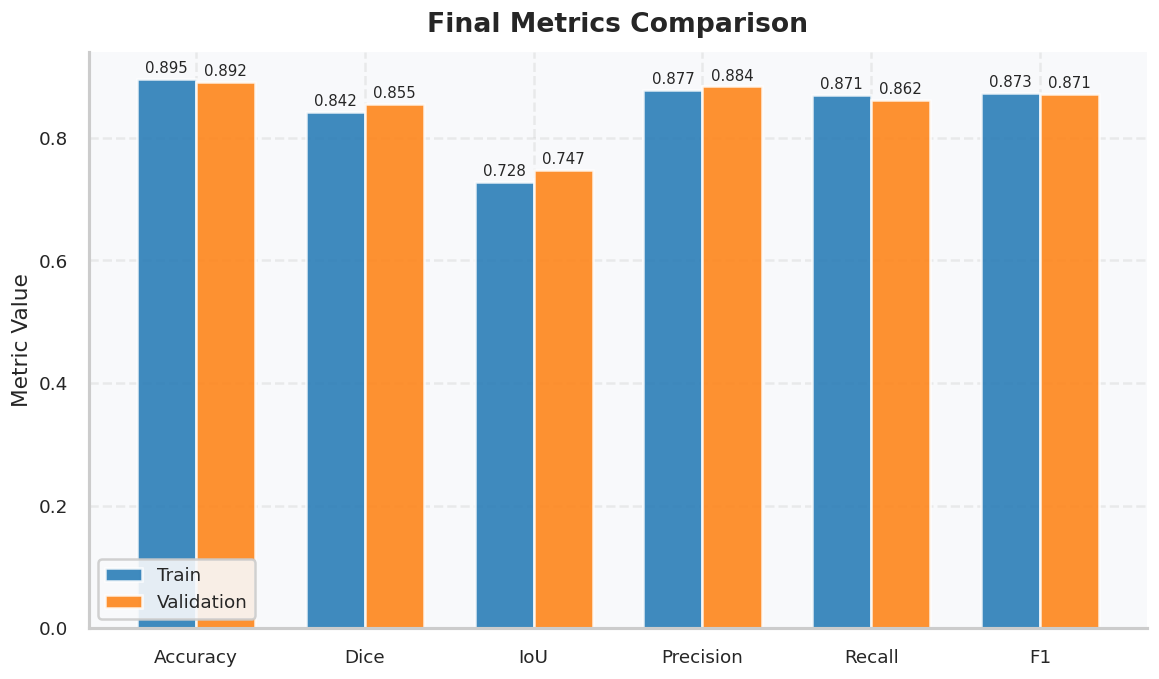

In [16]:
final_train = [
    history['accuracy'][-1], history['dice_coeff'][-1], history['iou_metric'][-1],
    history['precision'][-1], history['recall'][-1], history['f1_score'][-1]
]

final_val = [
    history['val_accuracy'][-1], history['val_dice_coeff'][-1], history['val_iou_metric'][-1],
    history['val_precision'][-1], history['val_recall'][-1], history['val_f1_score'][-1]
]

labels = ["Accuracy", "Dice", "IoU", "Precision", "Recall", "F1"]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, final_train, width, label="Train", color=TRAIN_COLOR, alpha=0.85, edgecolor="white")
bars2 = ax.bar(x + width/2, final_val, width, label="Validation", color=VAL_COLOR, alpha=0.85, edgecolor="white")

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title("Final Metrics Comparison", pad=12)
ax.set_ylabel("Metric Value")
style_axes(ax)
ax.legend(frameon=True, framealpha=0.9)

for bars in (bars1, bars2):
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.005,
            f"{bar.get_height():.3f}",
            ha="center",
            va="bottom",
            fontsize=9
        )

fig.tight_layout()
fig.savefig("plots/bar_final_metrics.png", dpi=400, bbox_inches="tight", facecolor="white")
plt.show()


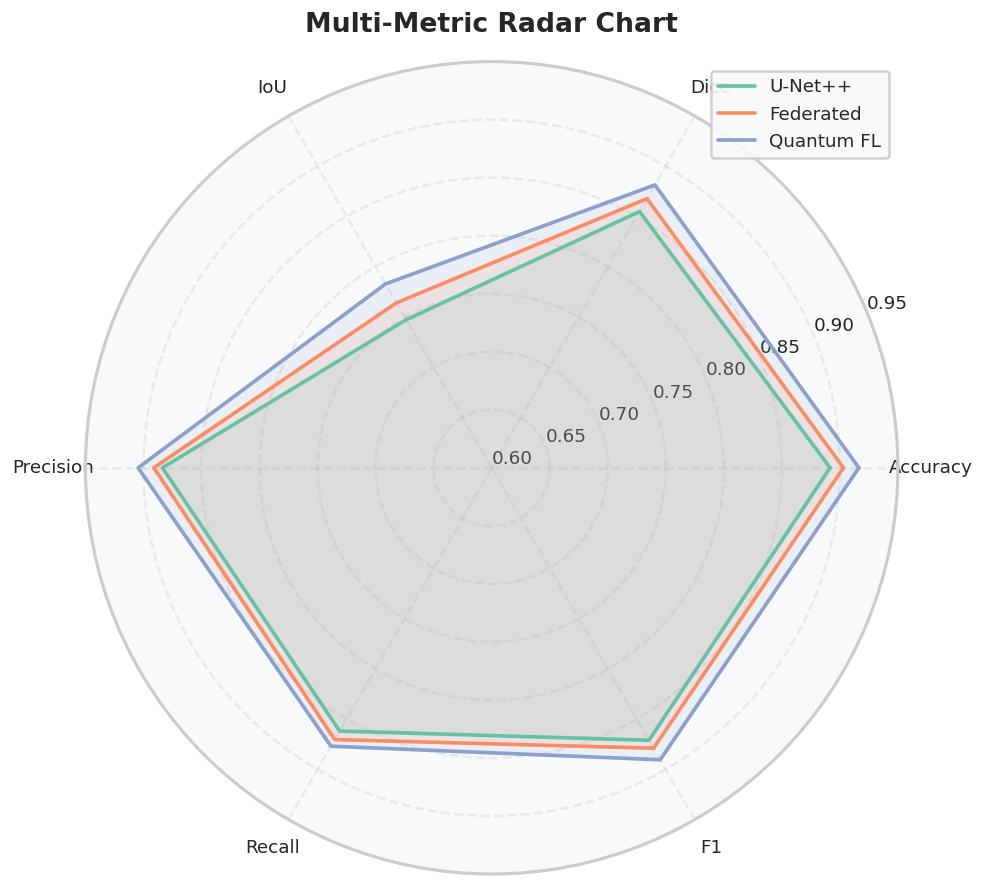

In [17]:
from math import pi

metrics = ['Accuracy', 'Dice', 'IoU', 'Precision', 'Recall', 'F1']
baseline = [0.8916, 0.8549, 0.7473, 0.8837, 0.8619, 0.8711]
federated = [0.9031, 0.8678, 0.7641, 0.8911, 0.8704, 0.8790]
quantum = [0.9164, 0.8814, 0.7829, 0.9046, 0.8770, 0.8905]

data = [baseline, federated, quantum]
labels = ["U-Net++", "Federated", "Quantum FL"]
radar_colors = sns.color_palette("Set2", n_colors=3)

angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

fig = plt.figure(figsize=(8.5,8.5))
ax = plt.subplot(111, polar=True)

for idx, model in enumerate(data):
    values = model + model[:1]
    ax.plot(angles, values, linewidth=2.2, color=radar_colors[idx], label=labels[idx])
    ax.fill(angles, values, color=radar_colors[idx], alpha=0.12)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_ylim(0.6, 0.95)
ax.set_title("Multi-Metric Radar Chart", pad=18)
ax.grid(True, linestyle="--", alpha=0.35)
ax.legend(loc='upper right', frameon=True, framealpha=0.9)

fig.tight_layout()
fig.savefig("plots/radar_comparison.png", dpi=400, bbox_inches="tight", facecolor="white")
plt.show()


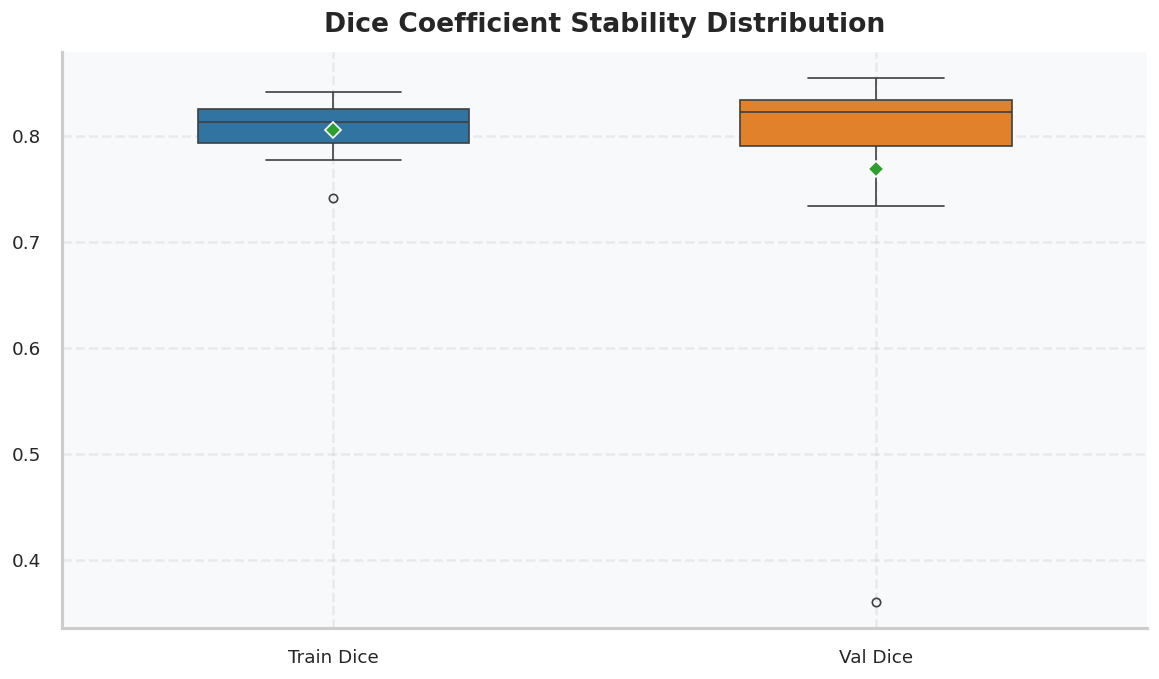

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(
    data=[history['dice_coeff'], history['val_dice_coeff']],
    palette=[TRAIN_COLOR, VAL_COLOR],
    width=0.5,
    showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": ACCENT_COLOR, "markeredgecolor": "white", "markersize": 7},
    ax=ax
    )
ax.set_xticks([0, 1])
ax.set_xticklabels(["Train Dice", "Val Dice"])
ax.set_title("Dice Coefficient Stability Distribution", pad=12)
style_axes(ax)

fig.tight_layout()
fig.savefig("plots/box_dice.png", dpi=400, bbox_inches="tight", facecolor="white")
plt.show()


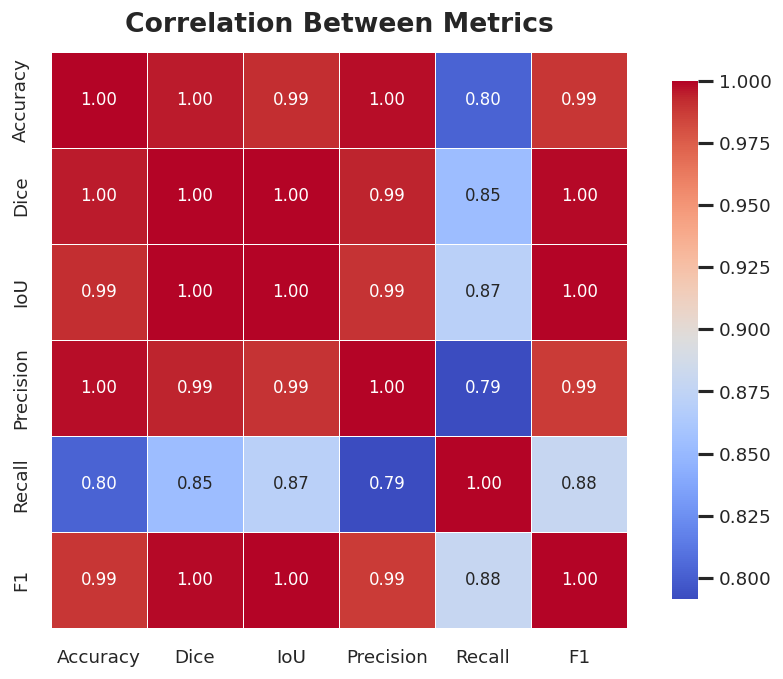

In [19]:
import pandas as pd

df = pd.DataFrame({
    "Accuracy": history["accuracy"],
    "Dice": history["dice_coeff"],
    "IoU": history["iou_metric"],
    "Precision": history["precision"],
    "Recall": history["recall"],
    "F1": history["f1_score"]
})

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.9},
    annot_kws={"size": 10},
    ax=ax
    )
ax.set_title("Correlation Between Metrics", pad=12)

fig.tight_layout()
fig.savefig("plots/heatmap_correlation.png", dpi=400, bbox_inches="tight", facecolor="white")
plt.show()


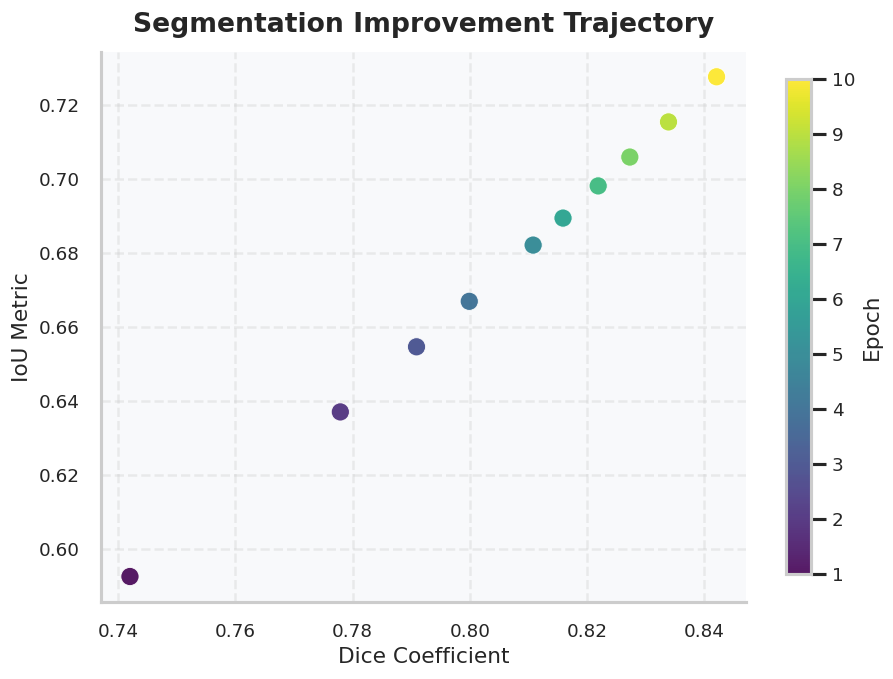

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(
    history['dice_coeff'],
    history['iou_metric'],
    s=120,
    c=epochs,
    cmap='viridis',
    alpha=0.9,
    edgecolors="white",
    linewidth=0.6
    )
cbar = fig.colorbar(scatter, ax=ax, shrink=0.9)
cbar.set_label("Epoch")
ax.set_xlabel("Dice Coefficient")
ax.set_ylabel("IoU Metric")
ax.set_title("Segmentation Improvement Trajectory", pad=12)
style_axes(ax)

fig.tight_layout()
fig.savefig("plots/scatter_improvement.png", dpi=400, bbox_inches="tight", facecolor="white")
plt.show()
